In [40]:
library(naturalsort)
library(data.table)
flst <- naturalsort(list.files('~/jackgl/analyses/gene_exon_counts/')) # File names are same for each directory (lung, colon, brain)

In [41]:
chroms <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X','Y')
for (i in 1:24) {
    load(paste0('~/jackgl/analyses/gene_exon_counts/',flst[i+1]))
    rownames(counts) <- gnames
    counts[,1] <- counts[,1]*11.55
    counts[,2] <- counts[,2]*7.25
    counts[,3] <- counts[,3]*1.95
    counts[,4] <- counts[,4]*1.00
    counts <- round(rowSums(counts))
    if (i==1) {
        out <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),p=counts,type=rep(0,length(counts)))
    } else {
        tmp <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),p=counts,type=rep(0,length(counts)))
        out <- rbind(out,tmp)
    }
}
# out$p <- out$p/sum(out$p)
tail(out)
gene_pdt <- out

chrom,geneSym,p,type
Y,TPTE2P4,841,0
Y,CYCSP49,140,0
Y,SLC25A15P1,87,0
Y,PARP4P1,814,0
Y,FAM58CP,37,0
Y,CTBP2P1,23,0


In [42]:
tsgs <- read.table('~/jackgl/sim-develop/data/Human_TSGs.txt')
tsgs <- tsgs$V2
tsgs <- tsgs[2:length(tsgs)]
head(tsgs)

[1] ACHE   ACY1   ADARB1 ADPRH  PARP1  AGTR1 
1218 Levels: ABCG2 ABI2 ACHE ACVR1C ACY1 ADAMTS18 ADAMTS8 ADAMTS9 ... ZYX

In [43]:
gene_pdt[order(-gene_pdt$p),][1:20]

chrom,geneSym,p,type
12,HELLPAR,107414,0
11,KCNQ1OT1,39124,0
2,TTN,36736,0
22,AC006548.28,31301,0
22,RP3-394A18.1,21722,0
22,RP3-323A16.1,20286,0
6,ARID1B,20142,0
3,ZBTB20,18483,0
18,SMAD2,18385,0
13,PCDH9,18197,0


In [44]:
cat('Genes in TSGene 2.0:')
length(tsgs)
cat('Found in Ensembl v86 gene annotation:')
length(which(gene_pdt$geneSym %in% tsgs))
cat(paste(length(which(gene_pdt$geneSym %in% tsgs))/length(tsgs)*100,'%'))

Genes in TSGene 2.0:

[1] 1217

Found in Ensembl v86 gene annotation:

[1] 1172

96.3023829087921 %

In [45]:
gene_pdt_tsgs <- gene_pdt[gene_pdt$geneSym %in% tsgs]
gene_pdt_tsgs[order(-gene_pdt_tsgs$p),][1:20]

chrom,geneSym,p,type
18,SMAD2,18385,0
13,PCDH9,18197,0
18,TCF4,16093,0
13,INTS6,15098,0
17,NF1,14299,0
11,ARHGEF12,13259,0
2,ABI2,11715,0
11,ATM,11024,0
3,RBMS3,10915,0
15,NTRK3,10176,0


In [46]:
gene_pdt_tsgs <- gene_pdt_tsgs[order(-gene_pdt_tsgs$p),]
head(gene_pdt_tsgs)

chrom,geneSym,p,type
18,SMAD2,18385,0
13,PCDH9,18197,0
18,TCF4,16093,0
13,INTS6,15098,0
17,NF1,14299,0
11,ARHGEF12,13259,0


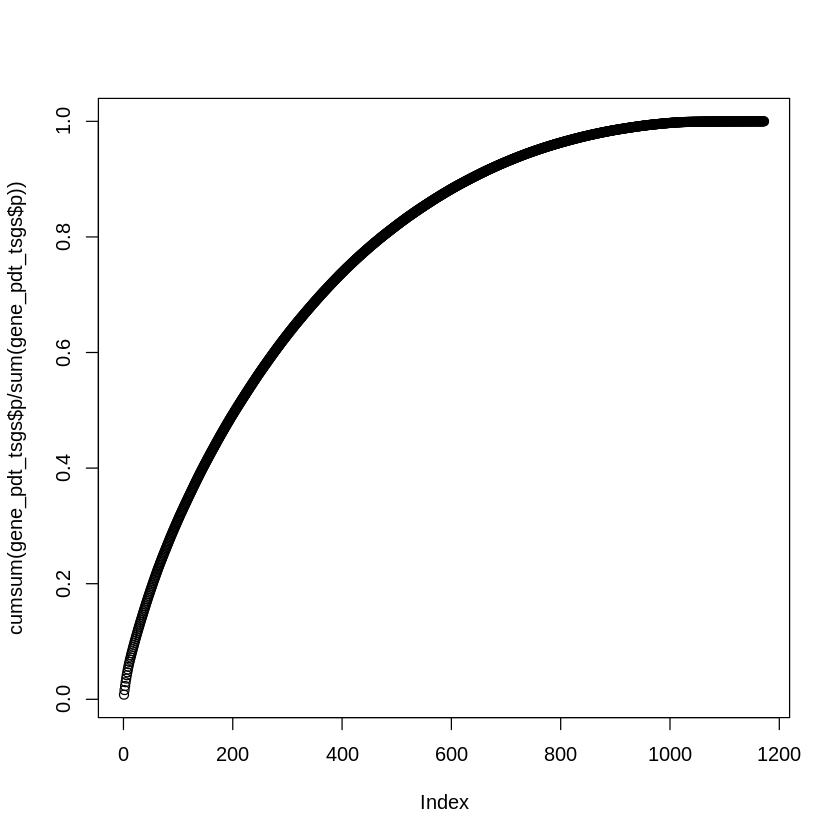

In [56]:
plot(cumsum(gene_pdt_tsgs$p/sum(gene_pdt_tsgs$p)))
test <- cumsum(gene_pdt_tsgs$p/sum(gene_pdt_tsgs$p))
# test[1:50]

In [64]:
lee_genes <- read.table('~/jackgl/lee_genes.txt')
head(lee_genes)
length(lee_genes$V1)

V1
SPHKAP
ERBB4
KCNIP1
FPR2
COL11A1
GPR158


[1] 65

In [65]:
length(which(lee_genes$V1 %in% gene_pdt_tsgs$geneSym))

[1] 7

In [72]:
which(lee_genes$V1 %in% gene_pdt_tsgs$geneSym)

[1]  2 22 26 32 50 56 62